In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Selected Topics - CSE 891 - MRupp\\MyNotebooks")


## Importing the data 

In [3]:
import pandas as pd

df = pd.read_excel (r'bank_additional_full.xlsx')
#print (df)

# Processing the Data

### Checking for missing data

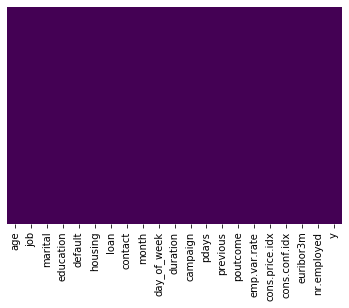

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Exploratory Data Analysis

## Checking the distribution of response variable  'y'

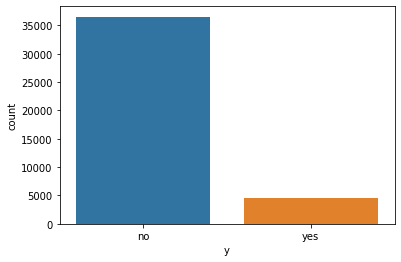

In [5]:
sns.countplot(x='y',data=df)

### In terms of percentage  yes= 11% , no= 88%

In [6]:
no_of_yes= len(df[df['y']=='yes'])
no_of_no= len(df[df['y']=='no'])
percentage_of_no = no_of_no/(no_of_no+no_of_yes)
print("percentage of no subscription is", percentage_of_no*100)
percentage_of_yes = no_of_yes/(no_of_no+no_of_yes)
print("percentage of subscription", percentage_of_yes*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [7]:
df.head(2)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
conda install -c conda-forge plotnine


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [9]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg


### Marital status distribution among subscribers

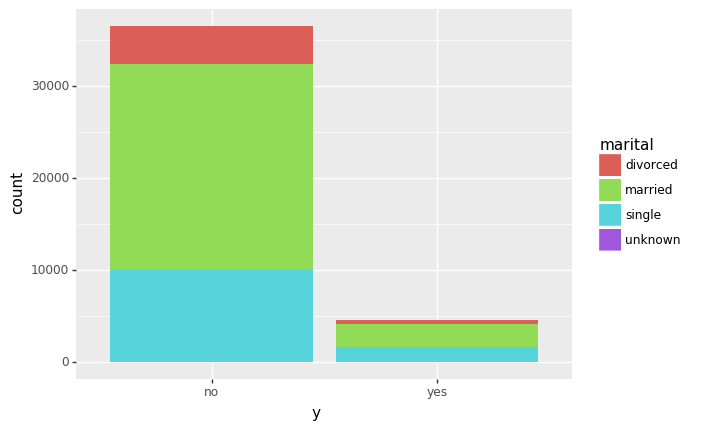

<ggplot: (-9223371892957420624)>

In [10]:
#sns.countplot(x='marital',y='y',data=df)

b1=ggplot(data=df)+geom_bar(mapping=aes(x='y',fill='marital'),position="stack")
b1

# Checking for and converting Categorical variables to as factor

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
#marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y

In [13]:
type(df['job'][1])

str

In [14]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
df = pd.read_excel (r'bank_additional_full.xlsx')
#print (df)

In [16]:
#Finding weights of yes and no in original data

In [15]:
job= pd.get_dummies(df['job'],drop_first=False)
marital= pd.get_dummies(df['marital'],drop_first=False)
education= pd.get_dummies(df['education'],drop_first=False)
default= pd.get_dummies(df['default'],drop_first=False)
housing= pd.get_dummies(df['housing'],drop_first=False)
loan= pd.get_dummies(df['loan'],drop_first=False)
contact= pd.get_dummies(df['contact'],drop_first=False)
month= pd.get_dummies(df['month'],drop_first=False)
day_of_week= pd.get_dummies(df['day_of_week'],drop_first=False)
poutcome = pd.get_dummies(df['poutcome'],drop_first=False)
#y= pd.get_dummies(df['y'],drop_first=False)
df.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1,inplace=True)


In [16]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df_final= pd.concat([df,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome],axis=1)
df_final.columns.values
#df_final.head()

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'divorced', 'married', 'single',
       'unknown', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree',
       'unknown', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'no',
       'unknown', 'yes', 'cellular', 'telephone', 'apr', 'aug', 'dec',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon',
       'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success'],
      dtype=object)

unique_yes=pd.unique(df_final[["yes"]].values.ravel())
unique_yes=np.unique(df_final[["yes"]],return_counts=True)
print(unique_yes)
print(len(df_final))

from collections import Counter 
len(df_final[df_final["yes"]==1])

In [18]:
no_of_yes= len(df_final[['yes']]==1)
no_of_no= len(df_final[['yes']]==0)
percentage_of_no = no_of_no/(no_of_no+no_of_yes)
print("percentage of no subscription is", percentage_of_no*100)
percentage_of_yes = no_of_yes/(no_of_no+no_of_yes)
print("percentage of subscription", percentage_of_yes*100)

percentage of no subscription is 50.0
percentage of subscription 50.0


In [19]:
#sns.countplot(x='y',data=train)

In [20]:
#Finding weights of probability between yes and no

In [21]:
#Below calculating correlation matrix

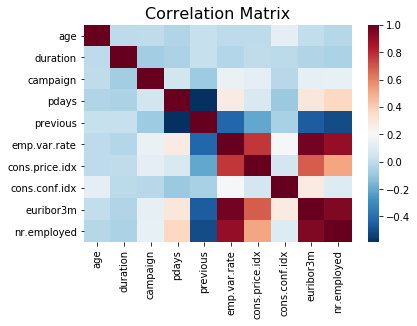

In [22]:
# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [23]:
###choosing variables?

In [27]:
##Rescaling the data

In [25]:
#!pip install imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [26]:
df_vars=np.array(df_final.columns.values.tolist())
df_vars

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'divorced', 'married', 'single',
       'unknown', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree',
       'unknown', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'no',
       'unknown', 'yes', 'cellular', 'telephone', 'apr', 'aug', 'dec',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon',
       'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success'],
      dtype='<U19')

In [30]:
print(type(df.iloc[:,1]))
print(type(df_final.loc[:,'y']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## Oversampling using SMOTE
Oversampling the data, using SMOTE. Below I used SMOTE to create extra data points for all dummified columns in df.final, from the original data set df. 'y' is present in both original data - df, and dummified data set df_final

In [32]:
x = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']


os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns

os_df_x,os_df_y=os.fit_sample(x_train, y_train)
os_df_x = pd.DataFrame(data=os_df_x,columns=columns )
os_df_y= pd.DataFrame(data=os_df_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_df_x))
print("Number of no subscription in oversampled data",len(os_df_y[os_df_y['y']=='no']))
print("Number of subscription",len(os_df_y[os_df_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_df_y[os_df_y['y']=='no'])/len(os_df_x))
print("Proportion of subscription data in oversampled data is ",len(os_df_y[os_df_y['y']=='yes'])/len(os_df_x))

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

## Stratified Sampling
Also tried stratified sampling, i.e. since original data has a 'no subscription' of about 88%, and a minority 'yes' which is our focus of 11$, I split the data into train and test ensuring the original distribution of 'yes' is maintained in the samples. Thus stratified sampling. I intend to try using both splits, by SMOTE and stratified sampling to see which will give me more accurate results, or minimal error.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# I split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
x2 = df_final.loc[:, df_final.columns != 'y']
y2 = df_final.loc[:, df_final.columns == 'y']

for train_set, test_set in stratified.split(x,y):
    stratified_train = df_final.loc[train_set]
    stratified_test = df_final.loc[test_set]
    
print(stratified_train["y"].value_counts()/len(stratified_train["y"]))
print(stratified_test["y"].value_counts()/len(stratified_test["y"]))

stratified_train.shape
#(28831, 64)
stratified_test.shape
#(12357, 64)

#stratified_train["y"].value_counts()/len(df_final)
#stratified_test["y"].value_counts()/len(df_final)

# Prediction - Logistic Regression
The plan:compare errors btw approach 1 and 2

## 1. Test/Validation approach  (2 models)

a.)Reducing the model - a1.from recursive selection and a2. just plain p-values of full model, compare error matrices

b.)Implementing the best model from  1

## 2. K-Fold cross validation approach. Algorithm splits data into k folds. 
compare best model error measures with best model from 1

## 3.Interprating the overall best model-i.e. with least error

In [ ]:
df_final_vars=df_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_df_x, os_df_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

## Clustering clients based on most important predictors - Attempt
Will attempt this after obtaining most important predictors to try and split marketing strategy by groups of the predictor variables

In [ ]:
np.array(df.columns.values.tolist())

In [ ]:
cluster_data = df[['previous','age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['previous','age'], inplace=True)
cluster_array = np.array(cluster_data)
cluster_array